# 時間序列處理

to_datetime

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
date_date = pd.to_datetime( ['1/2/2018', '1-2-2018', np.datetime64('2018-01-02'),'2018-01-02'] )
date_date

DatetimeIndex(['2018-01-02', '2018-01-02', '2018-01-02', '2018-01-02'], dtype='datetime64[ns]', freq=None)

date_range

In [3]:
hour_date = pd.date_range('2018-01-01', periods=3, freq='H')
hour_date

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [4]:
type(hour_date)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
type(hour_date[0])

pandas._libs.tslibs.timestamps.Timestamp

### 小練習:生成從2019年12月1日開始的五個日期，頻率為日

In [6]:
hour_date = pd.date_range('2019-12-01', periods=5, freq='D')
hour_date

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05'],
              dtype='datetime64[ns]', freq='D')

### 用pandas的時間資料型態好處

更改頻率

In [7]:
idx = pd.date_range('2018-01-01', periods=40, freq='H')

In [8]:
ts = pd.DataFrame(  {'count' : range(len(idx)) } , index=idx)

In [9]:
ts.head()

,count
2018-01-01 00:00:00,0
2018-01-01 01:00:00,1
2018-01-01 02:00:00,2
2018-01-01 03:00:00,3
2018-01-01 04:00:00,4


In [10]:
ts.resample('2H').mean().head()

,count
2018-01-01 00:00:00,0.5
2018-01-01 02:00:00,2.5
2018-01-01 04:00:00,4.5
2018-01-01 06:00:00,6.5
2018-01-01 08:00:00,8.5


In [11]:
ts.resample('4H').last().head()

,count
2018-01-01 00:00:00,3
2018-01-01 04:00:00,7
2018-01-01 08:00:00,11
2018-01-01 12:00:00,15
2018-01-01 16:00:00,19


In [12]:
ts.resample('1D').last()

,count
2018-01-01,23
2018-01-02,39


日期計算

In [13]:
someday = pd.Timestamp('2020-02-28')

In [14]:
someday.day_name()

'Friday'

In [15]:
further_day = someday+pd.Timedelta('1 d')
further_day

Timestamp('2020-02-29 00:00:00')

In [16]:
further_day = someday+pd.Timedelta('2 d')
further_day

Timestamp('2020-03-01 00:00:00')

In [17]:
further_day.day_name()

'Sunday'

[更多資料可見官方文檔](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

# 實際運用

[資料集-科羅拉多州某個機場的天氣](https://catalog.data.gov/dataset?tags=temperature)

In [18]:
CO_temperature = pd.read_csv('https://data.townofcary.org/api/v2/catalog/datasets/rdu-weather-history/exports/csv', sep=';')

In [19]:
CO_temperature.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2008-05-15,60.1,78.1,0.11,0.0,0.0,7.61,220.0,16.11,240.0,...,No,No,No,No,No,No,Yes,No,No,No
1,2008-05-17,46.9,75.0,0.00,0.0,0.0,8.05,230.0,19.91,220.0,...,No,No,No,No,No,No,No,No,No,No
2,2008-05-26,55.0,84.0,0.00,0.0,0.0,10.29,220.0,19.91,240.0,...,No,No,No,No,No,No,No,No,No,No
3,2008-05-31,68.0,89.1,0.00,0.0,0.0,10.29,230.0,21.03,220.0,...,No,No,No,Yes,Yes,No,No,No,Yes,No
4,2008-06-05,75.9,96.1,0.00,0.0,0.0,5.82,220.0,17.00,230.0,...,No,No,No,Yes,No,No,No,No,Yes,No


In [20]:
type(CO_temperature['date'][0])

str

apply

In [21]:
tidx = CO_temperature['date'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d') )
tidx.head()

0   2008-05-15
1   2008-05-17
2   2008-05-26
3   2008-05-31
4   2008-06-05
Name: date, dtype: datetime64[ns]

In [22]:
CO_temperature.index = tidx

In [23]:
CO_temperature

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2008-05-15,2008-05-15,60.1,78.1,0.11,0.0,0.0,7.61,220.0,16.11,240.0,...,No,No,No,No,No,No,Yes,No,No,No
2008-05-17,2008-05-17,46.9,75.0,0.00,0.0,0.0,8.05,230.0,19.91,220.0,...,No,No,No,No,No,No,No,No,No,No
2008-05-26,2008-05-26,55.0,84.0,0.00,0.0,0.0,10.29,220.0,19.91,240.0,...,No,No,No,No,No,No,No,No,No,No
2008-05-31,2008-05-31,68.0,89.1,0.00,0.0,0.0,10.29,230.0,21.03,220.0,...,No,No,No,Yes,Yes,No,No,No,Yes,No
2008-06-05,2008-06-05,75.9,96.1,0.00,0.0,0.0,5.82,220.0,17.00,230.0,...,No,No,No,Yes,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-04-28,2008-04-28,55.9,71.1,0.68,0.0,0.0,8.72,230.0,29.08,230.0,...,No,No,No,Yes,Yes,No,Yes,No,No,No
2008-05-03,2008-05-03,60.1,80.1,0.00,0.0,0.0,13.42,220.0,23.04,230.0,...,No,No,No,No,No,No,No,No,No,No
2008-05-07,2008-05-07,51.1,82.9,0.00,0.0,0.0,9.62,210.0,21.03,210.0,...,No,No,No,No,No,No,No,No,No,No


In [24]:
CO_temperature=CO_temperature.drop('date', axis=1)
CO_temperature.head()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2008-05-15,60.1,78.1,0.11,0.0,0.0,7.61,220.0,16.11,240.0,19.91,...,No,No,No,No,No,No,Yes,No,No,No
2008-05-17,46.9,75.0,0.00,0.0,0.0,8.05,230.0,19.91,220.0,25.95,...,No,No,No,No,No,No,No,No,No,No
2008-05-26,55.0,84.0,0.00,0.0,0.0,10.29,220.0,19.91,240.0,23.94,...,No,No,No,No,No,No,No,No,No,No
2008-05-31,68.0,89.1,0.00,0.0,0.0,10.29,230.0,21.03,220.0,25.05,...,No,No,No,Yes,Yes,No,No,No,Yes,No
2008-06-05,75.9,96.1,0.00,0.0,0.0,5.82,220.0,17.00,230.0,19.91,...,No,No,No,Yes,No,No,No,No,Yes,No


### 時間篩選

透過不同的時間區間來篩選

In [25]:
CO_temperature.index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008],
           dtype='int64', name='date', length=4823)

In [26]:
CO_temperature.index.month

Int64Index([5, 5, 5, 5, 6, 6, 6, 6, 6, 7,
            ...
            3, 3, 3, 4, 4, 4, 5, 5, 5, 5],
           dtype='int64', name='date', length=4823)

In [27]:
CO_temperature.index.day

Int64Index([15, 17, 26, 31,  5,  6, 14, 16, 17,  5,
            ...
            22, 27, 28, 18, 25, 28,  3,  7, 10, 12],
           dtype='int64', name='date', length=4823)

In [28]:
CO_temperature.index.day_name()

Index(['Thursday', 'Saturday', 'Monday', 'Saturday', 'Thursday', 'Friday',
       'Saturday', 'Monday', 'Tuesday', 'Saturday',
       ...
       'Saturday', 'Thursday', 'Friday', 'Friday', 'Friday', 'Monday',
       'Saturday', 'Wednesday', 'Saturday', 'Monday'],
      dtype='object', name='date', length=4823)

### 找2018年的資料

In [29]:
CO_temperature[CO_temperature.index.year == 2018]

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.1,28.2,0.00,0.00,0.00,6.49,40.0,14.99,40.0,21.92,...,No,No,No,No,No,No,No,No,No,No
2018-01-07,4.1,30.2,0.00,0.00,0.00,2.68,80.0,10.07,80.0,12.97,...,No,No,No,No,No,No,No,No,No,No
2018-03-03,35.1,57.0,0.00,0.00,0.00,8.72,340.0,17.00,350.0,29.08,...,No,No,No,No,No,No,No,No,No,No
2018-04-01,41.0,75.0,0.00,0.00,0.00,7.61,230.0,16.11,240.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2018-04-11,37.9,62.1,0.00,0.00,0.00,5.37,230.0,12.08,230.0,18.12,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,52.0,62.1,0.32,0.00,0.00,5.14,130.0,14.09,140.0,19.01,...,No,No,No,No,No,No,No,No,No,No
2018-12-05,30.2,48.0,0.00,0.00,0.00,4.03,290.0,16.11,280.0,23.94,...,No,No,No,No,No,No,No,No,No,No
2018-12-09,30.2,37.9,1.75,7.01,3.15,15.21,50.0,23.94,30.0,35.12,...,No,No,No,No,No,No,No,No,No,No


#### 法二

In [30]:
CO_temperature['2018']

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.1,28.2,0.00,0.00,0.00,6.49,40.0,14.99,40.0,21.92,...,No,No,No,No,No,No,No,No,No,No
2018-01-07,4.1,30.2,0.00,0.00,0.00,2.68,80.0,10.07,80.0,12.97,...,No,No,No,No,No,No,No,No,No,No
2018-03-03,35.1,57.0,0.00,0.00,0.00,8.72,340.0,17.00,350.0,29.08,...,No,No,No,No,No,No,No,No,No,No
2018-04-01,41.0,75.0,0.00,0.00,0.00,7.61,230.0,16.11,240.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2018-04-11,37.9,62.1,0.00,0.00,0.00,5.37,230.0,12.08,230.0,18.12,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-01,52.0,62.1,0.32,0.00,0.00,5.14,130.0,14.09,140.0,19.01,...,No,No,No,No,No,No,No,No,No,No
2018-12-05,30.2,48.0,0.00,0.00,0.00,4.03,290.0,16.11,280.0,23.94,...,No,No,No,No,No,No,No,No,No,No
2018-12-09,30.2,37.9,1.75,7.01,3.15,15.21,50.0,23.94,30.0,35.12,...,No,No,No,No,No,No,No,No,No,No


補充: 也可以往下選到月資料

In [31]:
CO_temperature['2018-01'].tail()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2018-01-12,55.9,71.1,0.50,0.00,0.0,11.41,240.0,23.04,230.0,31.99,...,No,No,No,No,No,No,No,No,No,No
2018-01-25,26.2,48.9,0.00,0.00,0.0,3.13,350.0,12.97,10.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2018-01-26,25.2,57.0,0.00,0.00,0.0,4.25,200.0,12.97,220.0,17.00,...,No,No,No,No,No,No,No,No,No,No
2018-01-17,23.2,37.9,0.49,5.91,0.0,5.82,30.0,18.12,20.0,25.05,...,No,No,No,No,No,No,No,No,No,No
2018-01-29,33.1,52.0,0.59,0.00,0.0,8.05,360.0,14.99,20.0,25.05,...,No,No,No,No,No,No,No,No,No,No


### 找每年1月和3月的資料

In [32]:
list_1=CO_temperature.index.month==1
list_3=CO_temperature.index.month==3

In [33]:
list_1 | list_3

array([False, False, False, ..., False, False, False])

In [34]:
list_1 & list_3

array([False, False, False, ..., False, False, False])

In [35]:
CO_temperature[(CO_temperature.index.month==1) | (CO_temperature.index.month==3)]

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2009-01-19,35.1,50.0,0.02,0.0,0.00,5.82,20.0,12.97,30.0,16.11,...,No,Yes,No,No,No,No,Yes,Yes,No,No
2009-01-20,23.0,35.1,0.19,3.5,2.01,6.71,30.0,19.91,30.0,25.95,...,No,Yes,No,No,No,No,No,No,No,No
2009-01-21,12.9,35.1,0.00,0.0,2.01,4.70,240.0,12.97,270.0,17.00,...,No,No,No,Yes,No,No,No,No,No,No
2009-01-22,21.9,48.9,0.00,0.0,0.00,5.82,230.0,14.09,220.0,14.99,...,No,No,No,No,No,No,No,No,No,No
2009-03-05,28.9,61.0,0.00,0.0,0.00,8.28,220.0,17.00,230.0,21.03,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-18,39.0,59.0,0.00,0.0,0.00,6.71,190.0,17.00,190.0,23.04,...,No,No,No,No,No,No,No,No,No,No
2008-03-21,33.1,66.9,0.00,0.0,0.00,6.71,210.0,16.11,210.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2008-03-22,48.0,75.0,0.00,0.0,0.00,12.75,230.0,25.05,220.0,34.90,...,No,No,No,No,No,No,No,No,No,No


### 小練習: 請找出2015, 2016兩年的各自7月與8月的資料

In [36]:
year = (CO_temperature.index.year == 2015) | (CO_temperature.index.year == 2016)
month = (CO_temperature.index.month == 7) | (CO_temperature.index.month == 8)
time_filter = year & month
CO_temperature[time_filter]

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2015-07-06,70.0,89.1,0.0,0.0,0.0,8.05,230.0,17.00,230.0,23.94,...,No,No,No,No,No,No,No,No,No,No
2015-07-24,68.0,86.0,0.0,0.0,0.0,5.14,50.0,16.11,40.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2015-07-28,73.0,90.0,0.0,0.0,0.0,4.03,170.0,14.09,150.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2015-07-31,71.1,91.0,0.0,0.0,0.0,3.80,40.0,12.97,30.0,17.00,...,No,No,No,No,No,No,No,No,No,No
2015-08-01,64.9,93.0,0.0,0.0,0.0,1.57,240.0,12.97,270.0,14.09,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-10,73.0,91.9,0.0,0.0,0.0,5.37,180.0,12.97,150.0,19.01,...,No,No,No,No,No,No,No,No,No,No
2016-08-12,75.9,93.9,0.0,0.0,0.0,6.04,220.0,14.09,220.0,17.00,...,No,No,No,No,No,No,No,No,No,No
2016-08-13,77.0,93.9,0.0,0.0,0.0,9.84,230.0,18.12,230.0,23.94,...,No,No,No,No,No,No,No,No,No,No


### 畫圖

畫出2018年以後的每日氣溫最高與最低折線圖

In [37]:
CO_temp_after_2018 = CO_temperature[CO_temperature.index.year>=2018]
CO_temp_after_2018

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13.1,28.2,0.00,0.00,0.0,6.49,40.0,14.99,40.0,21.92,...,No,No,No,No,No,No,No,No,No,No
2018-01-07,4.1,30.2,0.00,0.00,0.0,2.68,80.0,10.07,80.0,12.97,...,No,No,No,No,No,No,No,No,No,No
2018-03-03,35.1,57.0,0.00,0.00,0.0,8.72,340.0,17.00,350.0,29.08,...,No,No,No,No,No,No,No,No,No,No
2018-04-01,41.0,75.0,0.00,0.00,0.0,7.61,230.0,16.11,240.0,19.91,...,No,No,No,No,No,No,No,No,No,No
2018-04-11,37.9,62.1,0.00,0.00,0.0,5.37,230.0,12.08,230.0,18.12,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-20,33.1,43.0,0.47,2.52,0.0,6.49,60.0,16.11,60.0,21.92,...,No,No,No,No,No,No,No,No,No,No
2020-02-28,27.0,53.1,0.01,0.00,0.0,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
2020-02-29,28.9,46.9,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No


[]

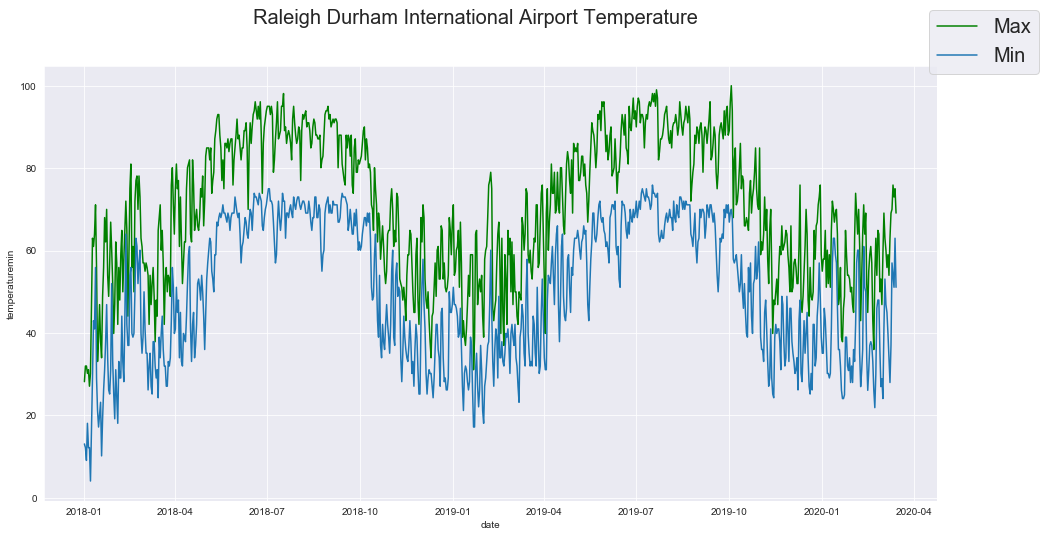

In [38]:
CO_temp_after_2018 = CO_temperature[CO_temperature.index.year>=2018]

fig = plt.figure(figsize=(16,8))
sns.lineplot(x=CO_temp_after_2018.index, y = 'temperaturemax', data=CO_temp_after_2018, color='g')
sns.lineplot(x=CO_temp_after_2018.index, y = 'temperaturemin', data=CO_temp_after_2018)
fig.suptitle('Raleigh Durham International Airport Temperature' , fontsize=20)
fig.legend(['Max','Min'], fontsize=20)
plt.plot()

### 均線平滑化

In [39]:
temp = CO_temperature[['temperaturemin','temperaturemax']]
temp.head()

,temperaturemin,temperaturemax
date,,
2008-05-15,60.1,78.1
2008-05-17,46.9,75.0
2008-05-26,55.0,84.0
2008-05-31,68.0,89.1
2008-06-05,75.9,96.1


In [40]:
temp.rolling(3).mean().head()

,temperaturemin,temperaturemax
date,,
2008-05-15,NaN,NaN
2008-05-17,NaN,NaN
2008-05-26,54.000000,79.033333
2008-05-31,56.633333,82.700000
2008-06-05,66.300000,89.733333


### 小練習: 畫出從2018年以來，10日均線的最高溫以及最低溫折線圖

In [41]:
temp_ma = temp.rolling(10).mean()

[]

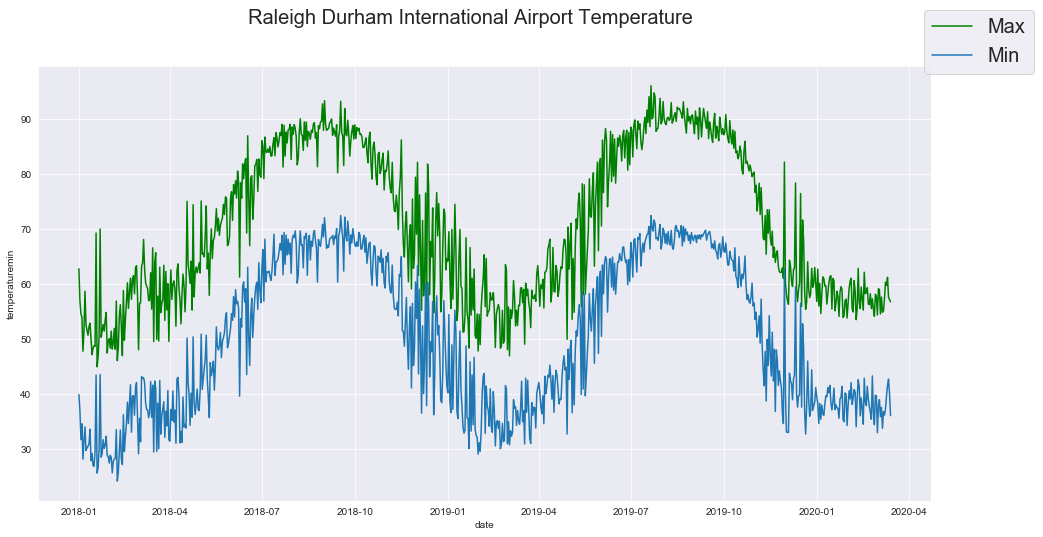

In [42]:
CO_temp_after_2018 = temp_ma[temp_ma.index.year>=2018]

fig = plt.figure(figsize=(16,8))
sns.lineplot(x=CO_temp_after_2018.index, y = 'temperaturemax', data=CO_temp_after_2018, color='g')
sns.lineplot(x=CO_temp_after_2018.index, y = 'temperaturemin', data=CO_temp_after_2018)
fig.suptitle('Raleigh Durham International Airport Temperature' , fontsize=20)
fig.legend(['Max','Min'], fontsize=20)
plt.plot()

### 小練習: 要如何把氣溫的資料集轉換成月頻率資料集呢? (以每個月最後一天的值來表示)

In [43]:
quizset = CO_temperature[ ['temperaturemin','temperaturemax'] ]
quizset = quizset.sort_index()
quizset.head()

,temperaturemin,temperaturemax
date,,
2007-01-01,48.9,68.0
2007-01-02,32.0,55.9
2007-01-03,28.9,62.1
2007-01-04,46.0,69.1
2007-01-05,57.0,72.0


In [44]:
quizset.resample('M').last().head()

,temperaturemin,temperaturemax
date,,
2007-01-31,25.0,39.9
2007-02-28,37.9,61.0
2007-03-31,46.9,79.0
2007-04-30,46.9,87.1
2007-05-31,64.0,91.0


### 把最高和最低欄位 用每月當中的最高溫以及最低溫表示

In [45]:
min_max = quizset.resample('M').last()
min_max['temperaturemax'] = quizset.resample('M').max()['temperaturemax']
min_max['temperaturemin']  = quizset.resample('M').min()['temperaturemin']
min_max

,temperaturemin,temperaturemax
date,,
2007-01-31,19.9,73.9
2007-02-28,15.1,73.9
2007-03-31,26.1,87.1
2007-04-30,27.0,87.1
2007-05-31,42.1,91.9
...,...,...
2019-11-30,24.3,73.0
2019-12-31,25.2,75.9
2020-01-31,24.1,72.0


[]

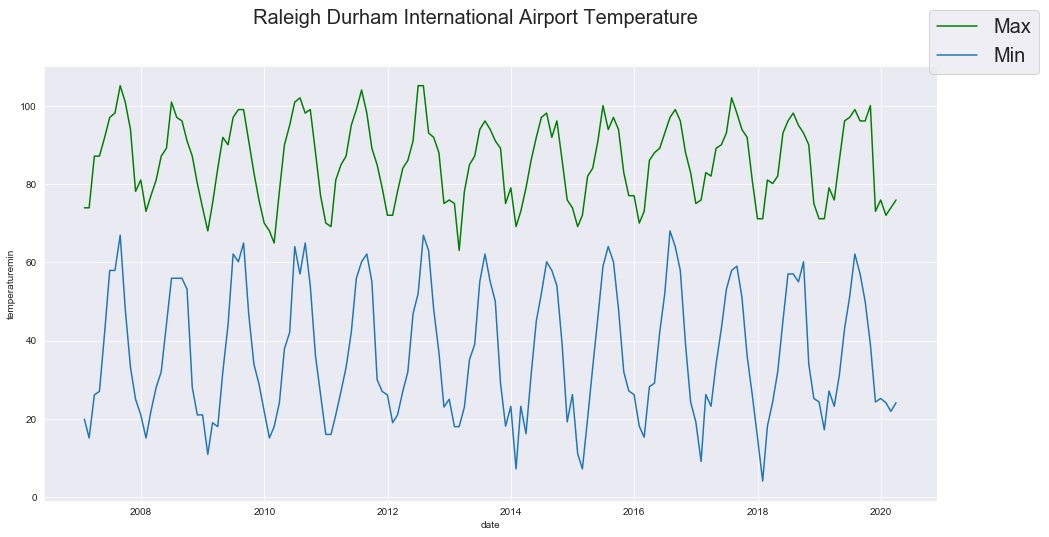

In [46]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x=min_max.index, y = 'temperaturemax', data=min_max, color='g')
sns.lineplot(x=min_max.index, y = 'temperaturemin', data=min_max)
fig.suptitle('Raleigh Durham International Airport Temperature' , fontsize=20)
fig.legend(['Max','Min'], fontsize=20)
plt.plot()

# 畫函數

In [47]:
x = np.linspace(-1, 1, num=120) #用linspace做出x
x

array([-1.        , -0.98319328, -0.96638655, -0.94957983, -0.93277311,
       -0.91596639, -0.89915966, -0.88235294, -0.86554622, -0.8487395 ,
       -0.83193277, -0.81512605, -0.79831933, -0.78151261, -0.76470588,
       -0.74789916, -0.73109244, -0.71428571, -0.69747899, -0.68067227,
       -0.66386555, -0.64705882, -0.6302521 , -0.61344538, -0.59663866,
       -0.57983193, -0.56302521, -0.54621849, -0.52941176, -0.51260504,
       -0.49579832, -0.4789916 , -0.46218487, -0.44537815, -0.42857143,
       -0.41176471, -0.39495798, -0.37815126, -0.36134454, -0.34453782,
       -0.32773109, -0.31092437, -0.29411765, -0.27731092, -0.2605042 ,
       -0.24369748, -0.22689076, -0.21008403, -0.19327731, -0.17647059,
       -0.15966387, -0.14285714, -0.12605042, -0.1092437 , -0.09243697,
       -0.07563025, -0.05882353, -0.04201681, -0.02521008, -0.00840336,
        0.00840336,  0.02521008,  0.04201681,  0.05882353,  0.07563025,
        0.09243697,  0.1092437 ,  0.12605042,  0.14285714,  0.15

$y=x^3-2x^2+x+3$

In [48]:
#定義一個對應的y function

def y(x):
    return x**3-2*x**2+x+3

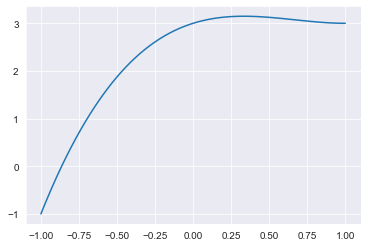

In [49]:
#畫圖!
sns.lineplot(x,y(x))
plt.show()

[維基百科 : xkcd](https://zh.wikipedia.org/wiki/Xkcd)

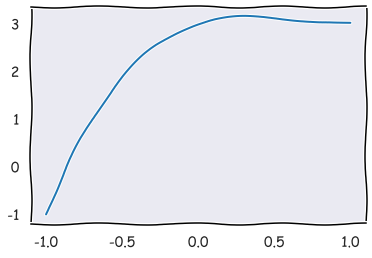

In [50]:
with plt.xkcd():
    # This figure will be in XKCD-style
    fig1 = plt.figure()
    sns.lineplot(x,y(x))
    plt.show()

### 愛心方程式

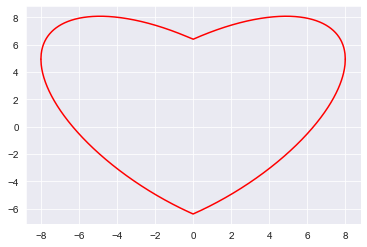

In [51]:
x = np.linspace(-8 , 8, 1024)

y1 = 0.618*np.abs(x) - 0.8* np.sqrt(64-x**2)

y2 = 0.618*np.abs(x) + 0.8* np.sqrt(64-x**2)

sns.lineplot(x,y1, color='r')
sns.lineplot(x,y2, color='r')

plt.show()

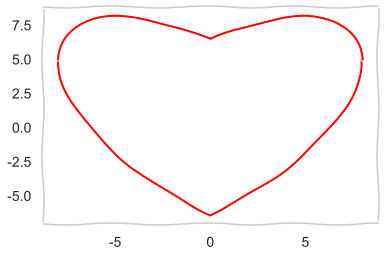

In [52]:
with plt.xkcd():
    sns.set_style('whitegrid')
    x = np.linspace(-8 , 8, 1024)
    
    y1 = 0.618*np.abs(x) - 0.8* np.sqrt(64-x**2)
    y2 = 0.618*np.abs(x) + 0.8* np.sqrt(64-x**2)

    sns.lineplot(x,y1, color='r')
    sns.lineplot(x,y2, color='r')

    plt.show()

# 股價資料

In [53]:
import pandas as pd
import numpy as np
import pandas_datareader as web


C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [54]:
start_day='2016-01-01'
end_day='2020-03-31'

In [55]:
SP_500=web.DataReader(name='^GSPC', data_source='yahoo', start=start_day, end=end_day)

In [56]:
type(SP_500.index[1])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
SP_500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966


## 畫出股價走勢

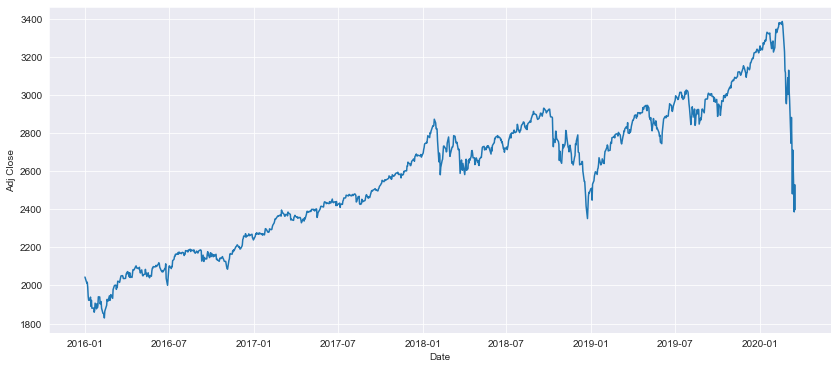

In [58]:
fig ,ax= plt.subplots(figsize=(14,6))
sns.lineplot(x=SP_500.index, y='Adj Close', data=SP_500)

plt.show()

# 計算每日報酬

In [59]:
SP_500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966


In [60]:
SP_500.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,2062.540039,2043.619995,2060.590088,2043.939941,2.655330e+09,2043.939941
2016-01-05,2038.199951,1989.680054,2038.199951,2012.660034,4.304880e+09,2012.660034
2016-01-06,2021.939941,2004.170044,2013.780029,2016.709961,3.706620e+09,2016.709961
2016-01-07,2011.709961,1979.050049,2011.709961,1990.260010,4.336660e+09,1990.260010


In [61]:
SP_500['Return'] = SP_500['Adj Close'] / SP_500['Adj Close'].shift(1) - 1
SP_500.head()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941,NaN
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034,-0.015304
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961,0.002012
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010,-0.013115
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966,-0.023700


### 以月分來看報酬分布情形

In [62]:
SP_500[SP_500.index.month==1].head()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034,-0.015304
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961,0.002012
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010,-0.013115
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966,-0.023700
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029,-0.010838


In [63]:
months=np.unique(SP_500.index.month)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [64]:
SP_500['month'] = SP_500.index.month
SP_500['month_name'] = SP_500.index.month_name()

In [65]:
SP_500['Annualized Ret'] = SP_500['Return'] * 252

In [66]:
SP_500.head()

,High,Low,Open,Close,Volume,Adj Close,Return,month,month_name,Annualized Ret
Date,,,,,,,,,,
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941,NaN,12,December,NaN
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034,-0.015304,1,January,-3.856540
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961,0.002012,1,January,0.507081
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010,-0.013115,1,January,-3.305080
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966,-0.023700,1,January,-5.972512


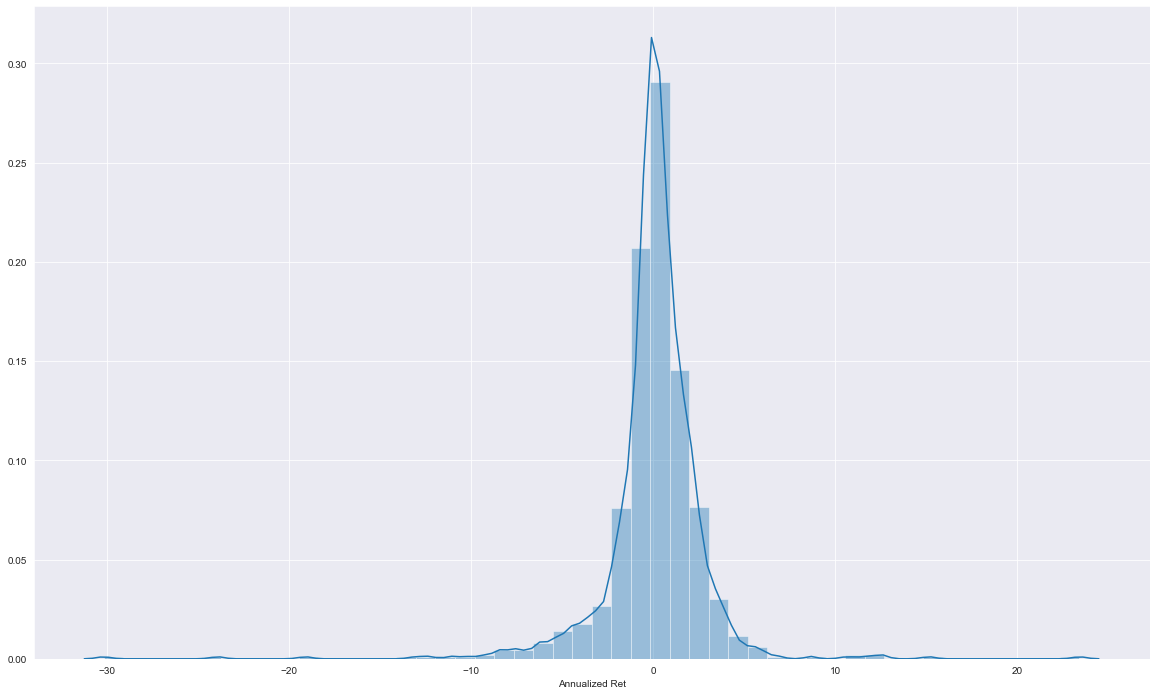

In [67]:
fig, ax = plt.subplots(figsize=(20,12))
sns.distplot(SP_500['Annualized Ret'] )

Text(0.5, 1.0, '2017')

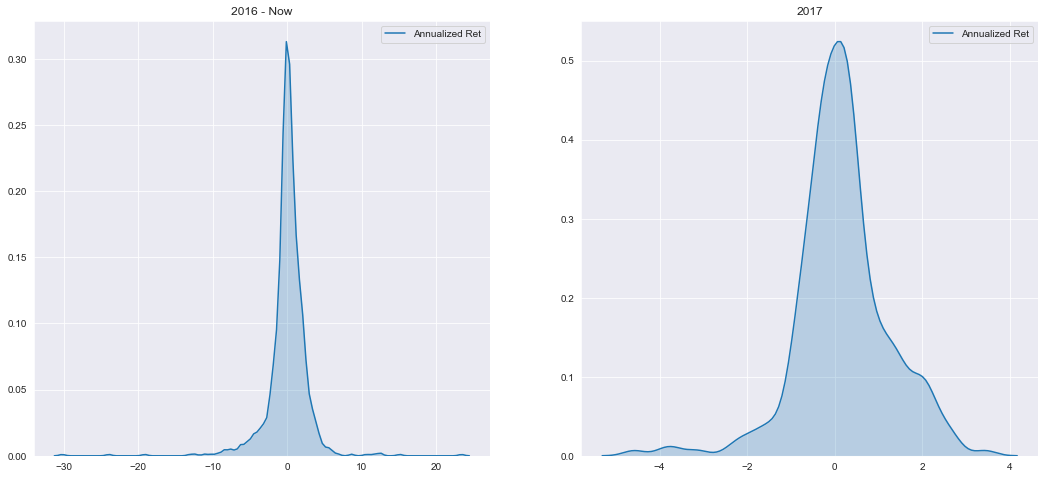

In [68]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.kdeplot(SP_500['Annualized Ret'] ,shade=True, ax=ax[0])
sns.kdeplot(SP_500['2017']['Annualized Ret'] ,shade=True, ax=ax[1])

ax[0].set_title('2016 - Now')
ax[1].set_title('2017')

# 檢查特定月份效應

[元月效應](https://wiki.mbalib.com/zh-tw/%E4%B8%80%E6%9C%88%E6%95%88%E5%BA%94)

In [69]:
SP_500.groupby('month').mean()[['Return', 'Annualized Ret']].T

month,1,2,3,4,5,6,7,8,9,10,11,12
Return,0.000973,-0.000615,-0.001231,0.000671,-0.000205,0.000938,0.001248,0.000152,0.000507,-0.000517,0.001382,-0.000447
Annualized Ret,0.245077,-0.155052,-0.310248,0.169016,-0.051591,0.236319,0.314469,0.038262,0.127859,-0.130297,0.348233,-0.112721


Text(0.5, 1.0, 'Annualized Daily Return by Month')

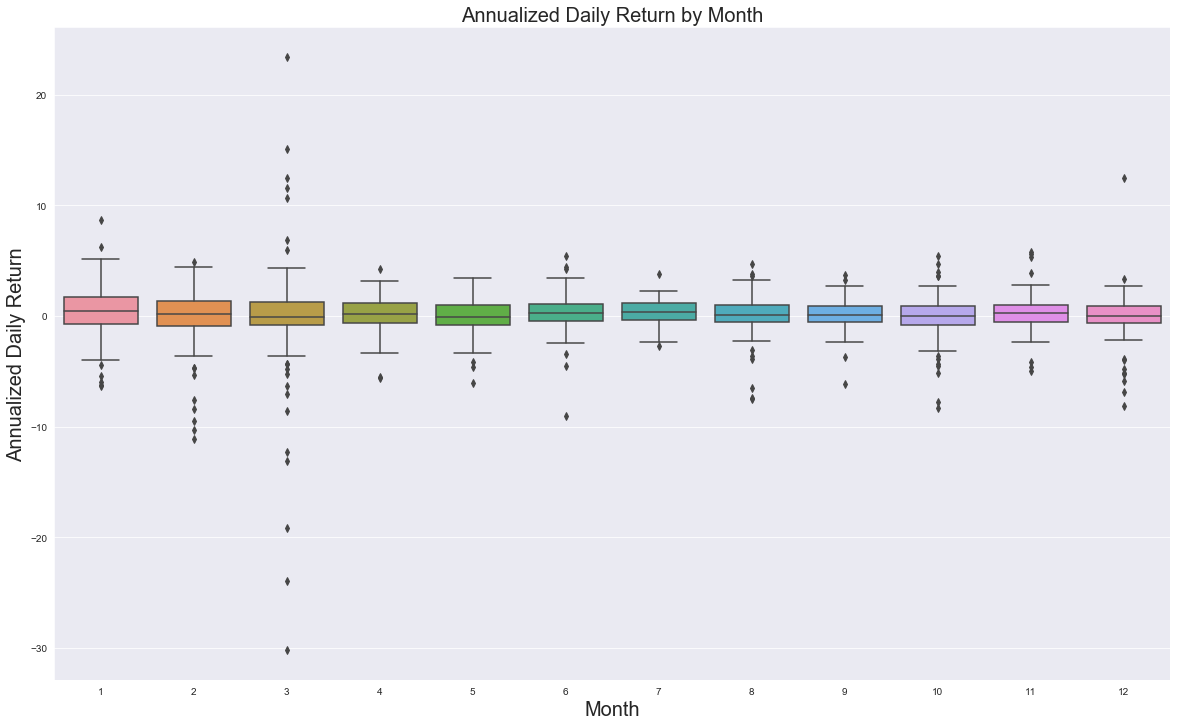

In [70]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style('darkgrid')

sns.boxplot(x='month', y='Annualized Ret', data=SP_500)

ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel ('Annualized Daily Return', fontsize=20)
ax.set_title('Annualized Daily Return by Month' ,fontsize=20)

#可以看到某些月份的股價變動比較劇烈，某些月份比較穩定
#但是這個例子只是為了方便解說因子所以三年資料，如果要更穩定的結果，建議要至少跨過一個經濟循環週期的資料

Text(0.5, 1.0, '2016-2017')

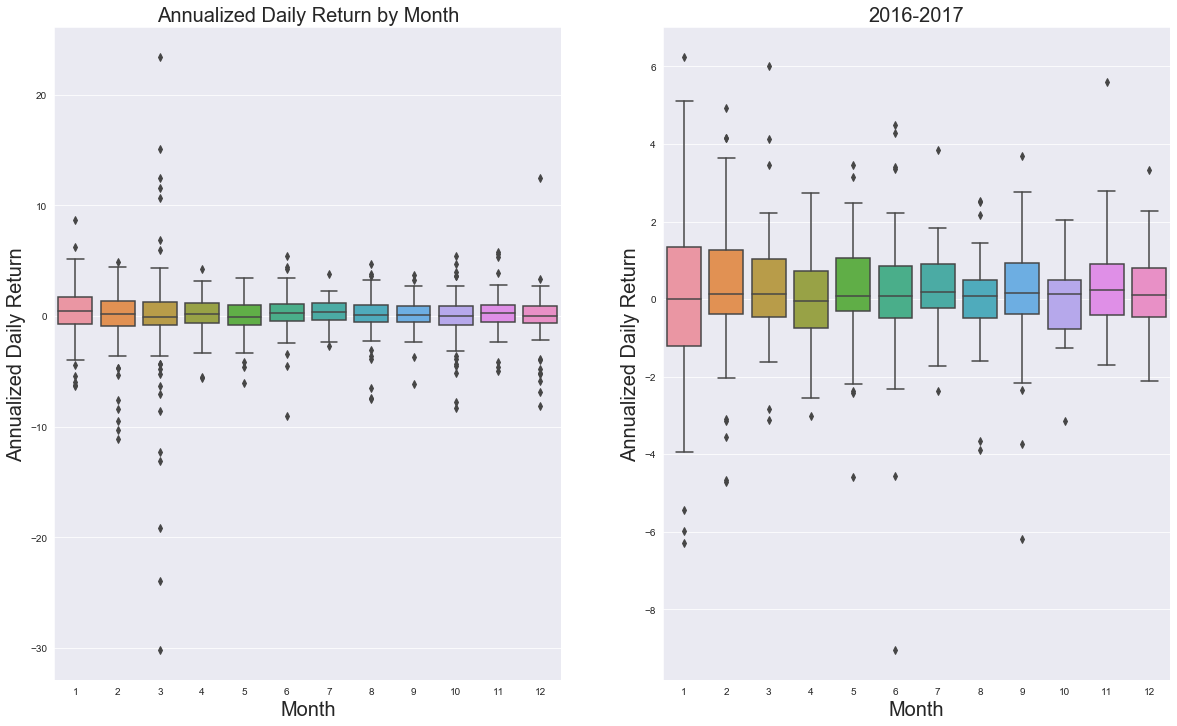

In [71]:
fig, ax = plt.subplots(1,2, figsize=(20,12))
sns.set_style('darkgrid')

sns.boxplot(x='month', y='Annualized Ret', data=SP_500, ax=ax[0])

sns.boxplot(x='month', y='Annualized Ret', data=SP_500['2016':'2017'], ax=ax[1])


ax[0].set_xlabel('Month', fontsize=20)
ax[0].set_ylabel ('Annualized Daily Return', fontsize=20)
ax[0].set_title('Annualized Daily Return by Month' ,fontsize=20)

ax[1].set_xlabel('Month', fontsize=20)
ax[1].set_ylabel ('Annualized Daily Return', fontsize=20)
ax[1].set_title('2016-2017' ,fontsize=20)

### 小練習：把上面例子的月改成星期試試看

In [72]:
df = SP_500.copy()
df['week']=SP_500.index.day_name()
df['Annualized Return']=df['Return']*252
df=df.dropna()

Text(0.5, 1.0, 'Annualized Daily Return by Weekday')

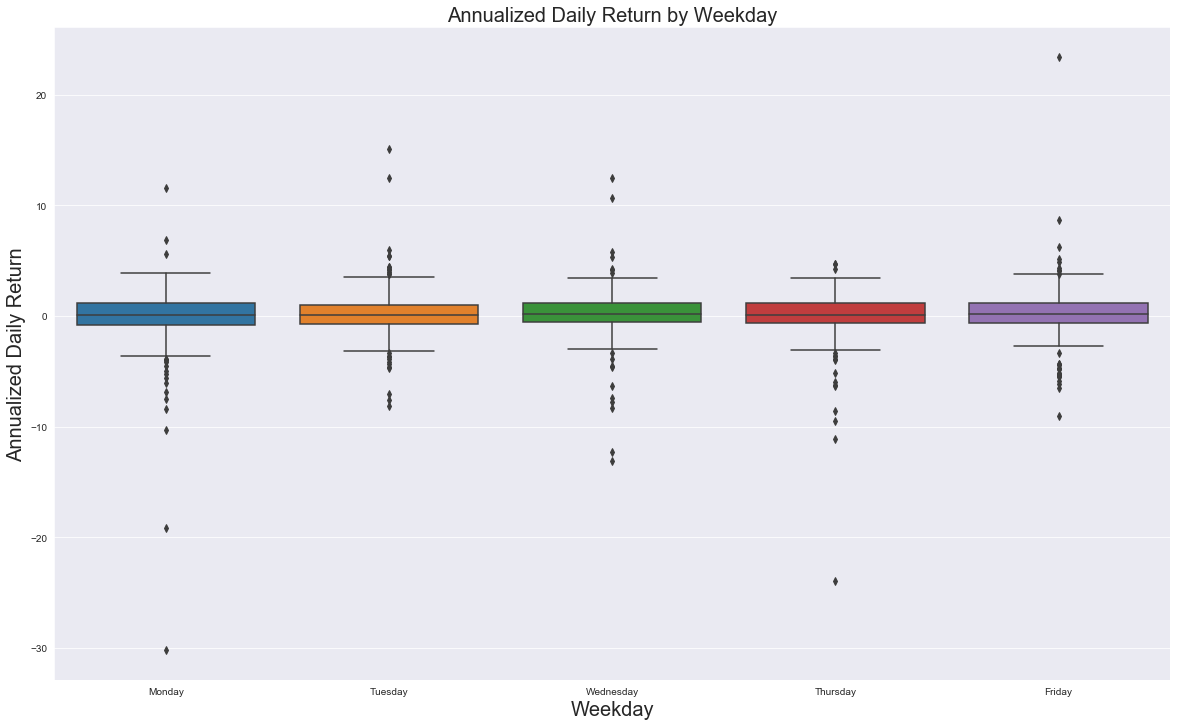

In [73]:
fig, ax = plt.subplots(figsize=(20,12))
sns.set_style('darkgrid')

sns.boxplot(x='week', y='Annualized Return', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

ax.set_xlabel('Weekday', fontsize=20)
ax.set_ylabel ('Annualized Daily Return', fontsize=20)
ax.set_title('Annualized Daily Return by Weekday' ,fontsize=20)
